In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

## Data Preprocessing

In [ ]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [ ]:
#Read data
data = pd.read_csv('/content/drive/MyDrive/CSE422/survey lung cancer1.csv')
data.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1.0,1,2,1,2,2.0,2,2.0,2,2,YES
1,M,74,2,1,1,1.0,2,2,2,1,1.0,1,2.0,2,2,YES
2,F,59,1,1,1,2.0,1,2,1,2,1.0,2,2.0,1,2,NO


In [ ]:
data.shape

(309, 16)

In [ ]:
#Checking for missing values
data.isnull().sum()

GENDER                    0
AGE                       0
SMOKING                   0
YELLOW_FINGERS            0
ANXIETY                   0
PEER_PRESSURE            21
CHRONIC DISEASE           0
FATIGUE                   0
ALLERGY                   0
WHEEZING                  0
ALCOHOL CONSUMING        12
COUGHING                  0
SHORTNESS OF BREATH      15
SWALLOWING DIFFICULTY     0
CHEST PAIN                0
LUNG_CANCER               0
dtype: int64

In [ ]:
#Imputing missing values
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(data[['PEER_PRESSURE']])
data['PEER_PRESSURE'] = impute.transform(data[['PEER_PRESSURE']])

impute.fit(data[['ALCOHOL CONSUMING']])
data['ALCOHOL CONSUMING'] = impute.transform(data[['ALCOHOL CONSUMING']])

impute.fit(data[['SHORTNESS OF BREATH']])
data['SHORTNESS OF BREATH'] = impute.transform(data[['SHORTNESS OF BREATH']])

In [ ]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
#Checking for duplicate values
data.duplicated().sum()

26

In [ ]:
#Dropping duplicate values
data=data.drop_duplicates()

In [ ]:
#Enconding Categorical Features
le = preprocessing.LabelEncoder()
data['GENDER']=le.fit_transform(data['GENDER'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1.0,1,2,1,2,2.0,2,2.0,2,2,1
1,1,74,2,1,1,1.0,2,2,2,1,1.0,1,2.0,2,2,1
2,0,59,1,1,1,2.0,1,2,1,2,1.0,2,2.0,1,2,0


In [ ]:
#Feature Selection
data_corr = data.corr()
data_corr

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.004608,0.035817,-0.209237,-0.152366,-0.251791,-0.174333,-0.096679,0.157025,0.128358,0.433780,0.120207,-0.066017,-0.051623,0.369953,0.054008
AGE,-0.004608,1.000000,-0.081173,0.020509,0.049381,0.015333,0.003882,0.019525,0.043814,0.066250,0.068142,0.176078,-0.005307,0.002695,-0.031611,0.103493
SMOKING,0.035817,-0.081173,1.000000,-0.005798,0.158769,-0.033039,-0.148995,-0.046238,-0.033349,-0.149047,-0.046870,-0.135327,0.026542,0.050965,0.106582,0.040571
YELLOW_FINGERS,-0.209237,0.020509,-0.005798,1.000000,0.560244,0.303646,0.019942,-0.096273,-0.153182,-0.069369,-0.269632,0.013937,-0.059911,0.340615,-0.100567,0.189400
ANXIETY,-0.152366,0.049381,0.158769,0.560244,1.000000,0.204195,-0.010944,-0.171539,-0.174594,-0.174964,-0.150287,-0.212887,-0.091203,0.492200,-0.132709,0.149279
PEER_PRESSURE,-0.251791,0.015333,-0.033039,0.303646,0.204195,1.000000,0.041350,0.091020,-0.089487,-0.061386,-0.145854,-0.090886,-0.188850,0.320436,-0.076642,0.165055
CHRONIC DISEASE,-0.174333,0.003882,-0.148995,0.019942,-0.010944,0.041350,1.000000,-0.111614,0.142836,-0.042117,-0.004802,-0.166266,-0.020032,0.061628,-0.028404,0.136961
FATIGUE,-0.096679,0.019525,-0.046238,-0.096273,-0.171539,0.091020,-0.111614,1.000000,-0.016458,0.143649,-0.201233,0.145638,0.385815,-0.107662,-0.011144,0.155631
ALLERGY,0.157025,0.043814,-0.033349,-0.153182,-0.174594,-0.089487,0.142836,-0.016458,1.000000,0.173823,0.361249,0.205917,-0.050569,-0.056584,0.258521,0.323267
WHEEZING,0.128358,0.066250,-0.149047,-0.069369,-0.174964,-0.061386,-0.042117,0.143649,0.173823,1.000000,0.259049,0.362092,-0.009770,0.100352,0.143002,0.245975


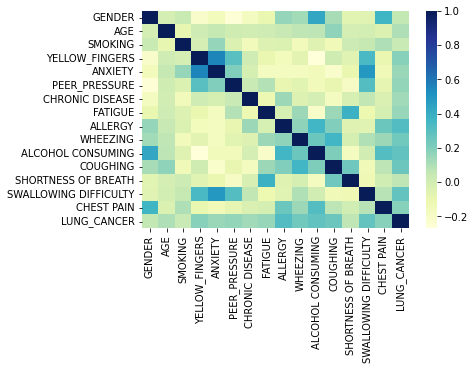

In [ ]:
sns.heatmap(data_corr, cmap = 'YlGnBu')

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from seaborn import heatmap
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
#Data splitting
x = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)


In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

In [ ]:
acc = []
f1 = []
precision = []
recall = []

In [ ]:
def storeMetrics(array):
  acc.append(metrics.accuracy_score(y_test, array))
  f1.append(metrics.f1_score(y_test, array))
  precision.append(metrics.precision_score(y_test, array))
  recall.append(metrics.recall_score(y_test, array))


In [ ]:
def score(model):
  print("The Training accuracy of the model is {:.2f}".format(model.score(x_train, y_train)))
  print("The Testing accuracy of the model is {:.2f}".format(model.score(x_test, y_test)))

In [ ]:
def rocCurve(model):
  model_pred_prob = model.predict_proba(x_test)[::,1]
  fpr, tpr, _ = roc_curve(y_test,  model_pred_prob)
  auc = metrics.roc_auc_score(y_test, model_pred_prob)
  plt.plot(fpr,tpr,label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

## Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
storeMetrics(lr_pred)

In [ ]:
score(lr)

The Training accuracy of the model is 0.92
The Testing accuracy of the model is 0.93


In [ ]:
mat=confusion_matrix(lr_pred, y_test)

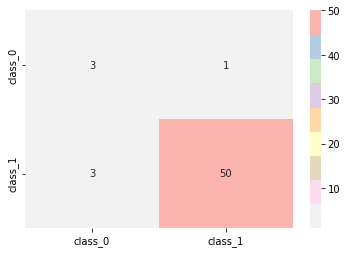

In [ ]:
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

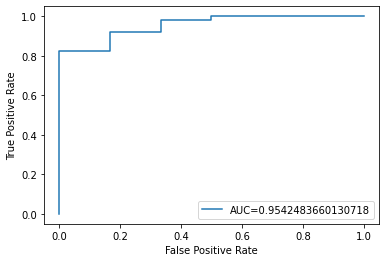

In [ ]:
rocCurve(lr)

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
storeMetrics(knn_pred)

In [ ]:
score(knn)

The Training accuracy of the model is 0.91
The Testing accuracy of the model is 0.95


In [ ]:
mat1=confusion_matrix(knn_pred, y_test)

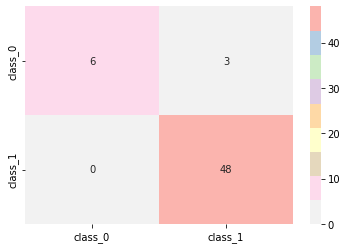

In [ ]:
heatmap(mat1 , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

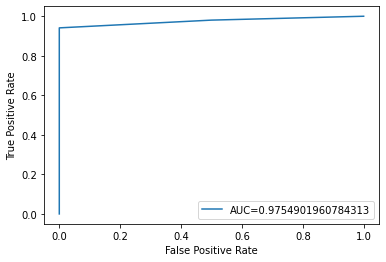

In [ ]:
rocCurve(knn)

## Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
storeMetrics(gnb_pred)


In [ ]:
score(gnb)

The Training accuracy of the model is 0.91
The Testing accuracy of the model is 0.89


In [ ]:
mat2=confusion_matrix(gnb_pred, y_test)

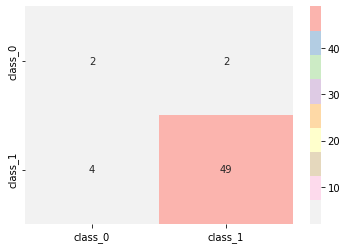

In [ ]:
heatmap(mat2 , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

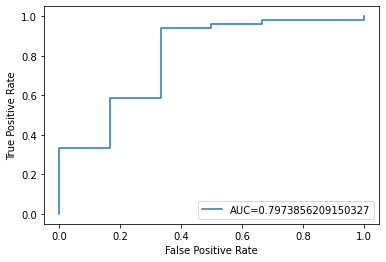

In [ ]:
rocCurve(gnb)

## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
storeMetrics(rf_pred)

In [ ]:
score(rf)

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.95


In [ ]:
mat4=confusion_matrix(rf_pred, y_test)

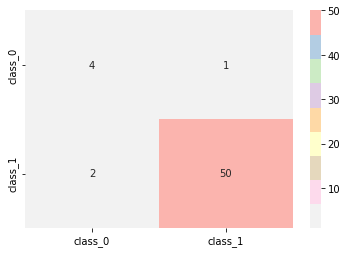

In [ ]:
heatmap(mat4 , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

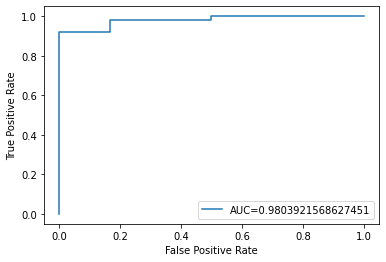

In [ ]:
rocCurve(rf)

## Comparison

In [ ]:
from IPython.display import display
dict = {'Model' : ['Logistic Regression', 'KNN', 'Naive Bayes', 'Random Forest'],
        'Accuracy Score' : acc,
        'F1 Score' : f1,
        'Precision Score': precision,
        'Recall Score': recall}
df = pd.DataFrame(dict)
df = df.round(2)
display(df)

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.93,0.96,0.94,0.98
1,KNN,0.95,0.97,1.00,0.94
2,Naive Bayes,0.89,0.94,0.92,0.96
3,Random Forest,0.95,0.97,0.96,0.98
